<a href="https://colab.research.google.com/github/monica367/Modelos-Probabilisticos/blob/master/Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISTRIBUIÇÃO BINOMIAL**


**I) Cálculo de probabilidade**


![alt text](http://professorguru.com.br/____impro/1/imagens-distribuicoes-de-probabilidade/binomial/formula-probabilidade-binomial.PNG?etag=W%2F%221d06-591df557%22&sourceContentType=image%2Fpng&ignoreAspectRatio&resize=456%2B144)

A função completa com os parâmetros k, n e p é dada por: binom.pmf(k, args, kwds) 

Observe que os parâmetros na ordem dada são:

-k: numero de sucessos desejado

-args: numero de realizações do experimento, ou seja, o “n” da fórmula

-kwds: probabilidade de sucesso em uma tentativa, o “p” na fórmula.

Exemplo: Um dado honesto com faces numeradas de 1 a 6 é lançado sete vezes. Determine a probabilidade de obtermos a face 4 exatamente duas vezes

Neste caso, temos que k=2 (pois a face 4 deve ocorrer exatamente duas vezes), n=7 (pois o dado será lançado 7 vezes) e p=1/6 (pois é a probabilidade de ocorrer a face 4 em uma tentativa)

In [0]:
from scipy.stats import binom
binom.pmf(2,7,1/6)

0.23442858367626898

**II) Construção da distribuição e do gráfico**

Exemplo: Suponha que foi constatado que a probabilidade de defeito de uma peça de metal produzida pela empresa X é de 0,2. Um lote com dez peças dessa empresa foi selecionado ao acaso. Seja X o número de peças com defeito no lote.

Considerando que temos um problema binomial com n=10 e p=0,2, faça a distribuição com todas as probabilidades de X, ou seja,  com k variando de 0 a 10.


In [0]:
from scipy.stats import binom

n = 10

p = 0.2

x = range(n+1)

p_x = binom.pmf(x,n,p) 
 
p_x

array([1.07374182e-01, 2.68435456e-01, 3.01989888e-01, 2.01326592e-01,
       8.80803840e-02, 2.64241152e-02, 5.50502400e-03, 7.86432000e-04,
       7.37280000e-05, 4.09600000e-06, 1.02400000e-07])

Faça um gráfico dessa distribuição



<BarContainer object of 11 artists>

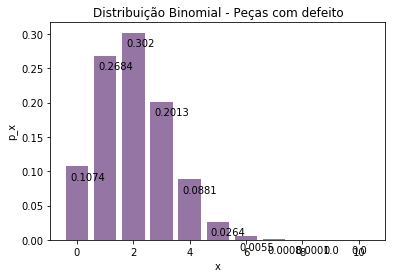

In [0]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('p_x')

for a,b in zip(x, p_x):
    plt.text(a-0.25, b-0.02, str(round(b,4)), color='black')

    plt.title('Distribuição Binomial - Peças com defeito')
plt.bar(x,p_x,color = (0.3,0.1,0.4,0.6))

**III) Cálculo de probabilidades**

a) Determine a probabilidade de encontrar no máximo três peças defeituosa no lote


Queremos calcular P(X<=3)=P(X=0)+P(X=1)+P(X=2)+P(X=3), sendo X o número de peças defeituosas

In [0]:

binom.pmf(0,10,0.2)+binom.pmf(1,10,0.2)+ binom.pmf(2,10,0.2)+binom.pmf(3,10,0.2)


0.8791261184000005

Podemos obter esse resultado usando a função cumulativa binom.cdf, sendo o primeiro parâmetro o limite que se está acumulando, o segundo o número de tentativas e o terceiro a probabilidade de sucesso



In [0]:
binom.cdf

binom.cdf(3,10,0.2) 

0.8791261184000001

b) determine a probabilidade de encontrar pelo menos três peças defeituosa

Neste caso, queremos determinar P(X>=3)

Podemos utilizar o processo complementar, ou seja, calcular:

P(X>=3)=1-P(X<3), ou seja,
P(X>=3)=1-P(X=0) - P(X=1)-P(X=2)


In [0]:
1-binom.pmf(0,10,0.2)-binom.pmf(1,10,0.2)-binom.pmf(2,10,0.2)

0.32220047359999976

ou utilizando o processo complementar com a função cumulativa binom.cdf:

In [0]:
1-binom.cdf(2,10,0.2)

0.3222004735999999

*Obs: Note que neste caso deve-se acumular até k=2*

**IV) Uso de programas para calcular probabilidades** 

a) Vamos usar um programa para calcular qualquer probabilidade binomial do tipo P(X<=k)

In [0]:
# A
from scipy.stats import binom

k=int(input('k: '))
n = int(input('n: '))
p =float(input('p: '))
binom.cdf(k,n,p)

k: 3
n: 10
p: 0.2


0.8791261184000001

b) Vamos usar um programa para calcular probabilidade binomial do tipo P(X<k)

In [0]:
from scipy.stats import binom

k=int(input('k: '))
n=int(input('n: '))
p=float(input('p: '))
binom.cdf(k-1,n,p)

k: 2
n: 10
p: 0.5


0.010742187499999998

c) Vamos usar um programa para calcular probabilidade binomial do tipo P(X>=k)


In [0]:
from scipy.stats import binom

k=int(input('k: '))
n=int(input('n: '))
p=float(input('p: '))
1-binom.cdf(k,n,p)

k: 1
n: 10
p: 0.5


0.9892578125

d) Vamos usar um programa para calcular probabilidade binomial do tipo P(X>k)

In [0]:
from scipy.stats import binom

k=int(input('k: '))
n=int(input('n: '))
p=float(input('p: '))
1-binom.cdf(k-1,n,p)
         

k: 5
n: 10
p: 0.2


0.03279349759999994

**V) Cálculo de média e variância**

Temos E(X)=n.p e VAR(X)=n.p.q

In [0]:
n=int(input('n: '))
p=float(input('p: '))
media = n * p
variancia = n*p*(1-p)
print('média:', media)
print('variância:', variancia)

n: 10
p: 0.2
média: 2.0
variância: 1.6
